In [15]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [16]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df = df.dropna()
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0
2,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0
3,8.0,1.0,0.0,1658.0,0.0,0.0,1.0,0.0,54.0
4,38.0,3.0,337.0,890.0,1.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...
3839,19.0,2.0,144.0,889.0,0.0,0.0,1.0,0.0,169.0
3840,40.0,8.0,317.0,922.0,0.0,0.0,0.0,1.0,149.0
3841,14.0,1.0,267.0,879.0,1.0,0.0,0.0,0.0,80.0
3842,73.0,2.0,51.0,822.0,1.0,0.0,0.0,0.0,180.0


In [17]:
#по корреляциям видим, что параматры действительно не самые очевидные, однако, модель может иметь практический смысл
df.corr()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
number_of_reviews,1.000000,0.068226,0.165840,-0.529214,0.011820,-0.006601,-0.012600,0.008601,0.098049
calculated_host_listings_count,0.068226,1.000000,0.228752,-0.164216,-0.006146,-0.021836,0.012613,-0.008945,0.111534
availability_365,0.165840,0.228752,1.000000,-0.323634,0.001465,0.001279,-0.005333,0.015476,0.133980
datetime_diff,-0.529214,-0.164216,-0.323634,1.000000,-0.008970,-0.010318,0.011636,-0.002353,-0.139733
room_type=0,0.011820,-0.006146,0.001465,-0.008970,1.000000,-0.113259,-0.954078,-0.133216,0.008157
room_type=1,-0.006601,-0.021836,0.001279,-0.010318,-0.113259,1.000000,-0.081871,-0.011431,0.012604
room_type=2,-0.012600,0.012613,-0.005333,0.011636,-0.954078,-0.081871,1.000000,-0.096297,-0.016865
room_type=3,0.008601,-0.008945,0.015476,-0.002353,-0.133216,-0.011431,-0.096297,1.000000,0.026382
price,0.098049,0.111534,0.133980,-0.139733,0.008157,0.012604,-0.016865,0.026382,1.000000


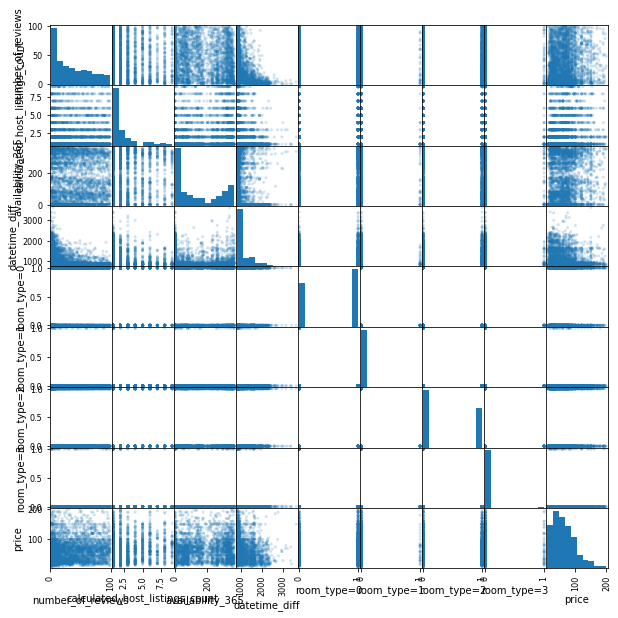

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [19]:
#применяем медод рекурсивного исключения признаков, где модель обучается по очереди уменьшая кол-во регрессоров
from sklearn.feature_selection import RFE

names = ['number_of_reviews', 'calculated_host_listings_count', 
         'availability_365', 'datetime_diff', 'room_type=0', 'room_type=1', 'room_type=2', 'room_type=3', 'price']
array = df.values
X = array[:,0:8]
Y = array[:,8]
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

In [21]:
fit.n_features_
fit.support_
fit.ranking_

# Лучшим признаком стал number_of_reviews, вторым aviability_365 и третьим datetime_diff

array([1, 4, 2, 3, 5, 8, 6, 7])

In [22]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
#строим линейную регрессию только по лучшему параметру - количеству обзоров
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 0:1], y_train)

In [26]:
sr.coef_, sr.intercept_

(array([0.12169095]), 59.59893402937792)

In [27]:
y_pred = sr.predict(X_test[:, 2:3])

In [28]:
sr.score(X_train[:, 0:1], y_train), sr.score(X_test[:, 0:1], y_test)

(0.009094770751366332, 0.011073541473723858)

In [29]:
sr.score(X_train[:, 0:1], y_train), sr.score(X_test[:, 0:1], y_test)

(0.009094770751366332, 0.011073541473723858)

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 0:1])), mean_squared_error(y_test, y_pred)

(1393.5105125005243, 1606.2229768713469)

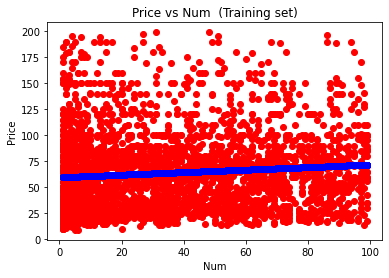

In [31]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], sr.predict(X_train[:, 0:1]), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

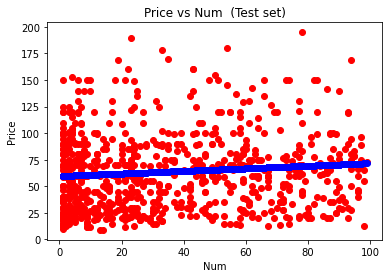

In [32]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sr.predict(X_test[:, 0:1]), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [33]:
#и по качеству модели, и по рисункам видно, что однонофакторная модель слабая. Попробуем паостроить что-то сложнее

In [34]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [35]:
mr.coef_, mr.intercept_

(array([ 0.03855683,  1.67915877,  0.02495074, -0.00798365, -2.73436351,
         3.02340184, -3.89335182,  3.60431349]),
 67.27922246881023)

In [36]:
y_pred = mr.predict(X_test)

In [37]:
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.03979767683736635, 0.01524374765977432)

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(1350.3330005324026, 1262.8425349605386)

In [39]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues

array([2.28165646e-63, 1.47289237e-01, 1.07376693e-06, 2.38451081e-06,
       9.20231741e-05, 2.13292854e-07, 3.44577552e-03, 6.07674995e-06,
       6.90030789e-04])

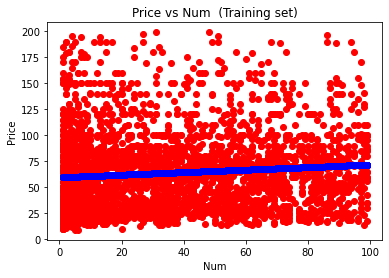

In [40]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], sr.predict(X_train[:, 0:1]), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

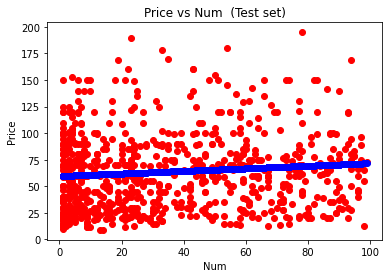

In [41]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sr.predict(X_test[:, 0:1]), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [44]:
#модель со всеми параметрами чуть чуть лучше, но все равно не годится для данного набора данных. строим регрессию с исключением

In [45]:
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [46]:
X_Modeled

array([[ 38.,   7., 252., 904.,   1.],
       [ 59.,   1., 204., 825.,   1.],
       [ 54.,   2., 315., 828.,   1.],
       ...,
       [ 43.,   2., 111., 829.,   1.],
       [ 96.,   1., 137., 819.,   1.],
       [  8.,   7.,   0., 897.,   1.]])

In [47]:
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, 0:4], y_train)

In [48]:
omr.coef_, omr.intercept_

(array([ 0.03814025,  1.66019107,  0.02520159, -0.00798467]),
 64.23376170239372)

In [49]:
y_pred = omr.predict(X_test[:, 0:4])

In [50]:
omr.score(X_train[:, 0:4], y_train), omr.score(X_test[:, 0:4], y_test)

(0.038918255797708246, 0.013950891904307539)

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, omr.predict(X_train[:, 0:4])), mean_squared_error(y_test, y_pred)

(1351.5697307741098, 1264.5004815190825)

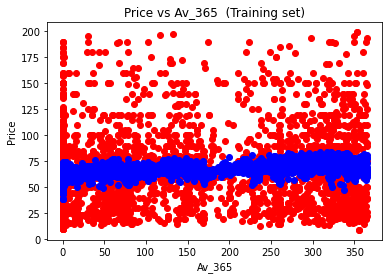

In [52]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], omr.predict(X_train[:, 0:4]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

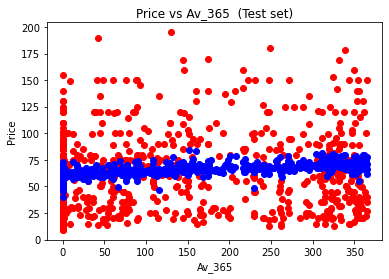

In [53]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [55]:
#не сказать, что модель стала лучше, на уровне общей регрессии

In [56]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [57]:
pr.coef_, pr.intercept_

(array([ 0.1820664 , -0.00043085]), 54.86185661163631)

In [58]:
y_pred = pr.predict(X_test_p[:,1:])

In [59]:
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.036189677629054784, 0.02603143217835291)

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(1355.4069315981292, 1249.0085056447342)

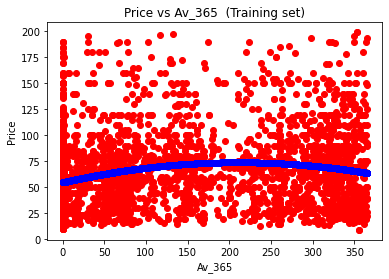

In [61]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

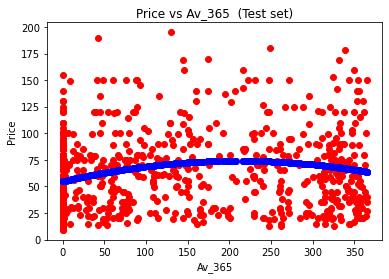

In [62]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [63]:
#видим, что линейные модели не справляются с этими значениями и неактуальны для данного прогнозирования
#однако, можно сказать, что некоторые параметры могут иметь ограниченное влияние на цену, что и будет предметом изучения далее